/!\ Execution longue

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
def calc_day(row):
    """
    Calculates the day based on the hours 

    Parameters
    ----------
    row :
        DataFrame row     
    """
    Day = row['step']//24
    return Day

In [4]:
df = pd.read_csv('../data/Fraud.csv')


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Analyse générale

In [7]:
df.shape

(6362620, 11)

Le Data Set regroupe 6362620 lignes

In [8]:
dest_unique = df['nameDest'].nunique()
orig_unique = df['nameOrig'].nunique()
print(f"Le data set comporte {dest_unique} identifiants de compte destinataire unique soit {dest_unique/df.shape[0] *100:.2f}  et {orig_unique} identifiants de compte d'origine unique/ \n"
f"CAD que {dest_unique/df.shape[0] *100:.2f}% et {orig_unique/df.shape[0] *100:.2f}% des opérations présent respectivement un identifiant de compte destinataire et d'origine unique.")

Le data set comporte 2722362 identifiants de compte destinataire unique soit 42.79  et 6353307 identifiants de compte d'origine unique/ 
CAD que 42.79% et 99.85% des opérations présent respectivement un identifiant de compte destinataire et d'origine unique.


In [9]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Il existe 5 type d'opérations. La plus recurente étant "CASH-OUT"

In [10]:
# df_fraud_nb_trans_reçu = df["nameDest"].unique()

# df_fraud_nb_trans_reçu = np.random.choice(df_fraud_nb_trans_reçu,size = 1000)
# count = 0
# i = 0
# for dest in df_fraud_nb_trans_reçu : 
#     count += df[df["nameDest"] == dest].shape[0]
#     i += 1
#     print(f"{i} : {count}")
# print(f"Nombre de virement reçu moyen : {count/len(df_fraud_nb_trans_reçu)}")

# Execution time : 15 min 

Nombre de virement reçu moyen : 2.49 sample = 1000

In [11]:
df.loc[df['amount'] <= 100, 'amount_range'] = '[0, 100]'
df.loc[(df['amount'] > 100) & (df['amount'] <= 500), 'amount_range'] = '[101, 500]'
df.loc[(df['amount'] > 500) & (df['amount'] <= 1000), 'amount_range'] = '[501, 1000]'
df.loc[(df['amount'] > 1000) & (df['amount'] <= 5000), 'amount_range'] = '[1001, 5000]'
df.loc[(df['amount'] > 5000) & (df['amount'] <= 10000), 'amount_range'] = '[5001, 10000]'
df.loc[(df['amount'] > 10000) & (df['amount'] <= 50000), 'amount_range'] = '[10001, 50000]'
df.loc[(df['amount'] > 50000) & (df['amount'] <= 200000), 'amount_range'] = '[50001, 200000]'
df.loc[(df['amount'] > 200000) & (df['amount'] <= 1000000), 'amount_range'] = '[200001, 1000000]'
df.loc[df['amount'] > 1000000, 'amount_range'] = '[1000001 +)'
amount = df.groupby(['amount_range']).agg({'amount': ['count', 'min', 'max']})
amount

amount                         
                     count         min          max
amount_range                                       
[0, 100]             14105        0.00       100.00
[1000001 +)         130626  1000008.72  92445516.64
[10001, 50000]     1519856    10000.02     49999.98
[1001, 5000]        559855     1000.01      5000.00
[101, 500]           56987      100.01       500.00
[200001, 1000000]  1542944   200000.08    999988.34
[50001, 200000]    1883103    50000.12    199999.86
[5001, 10000]       583590     5000.01     10000.00
[501, 1000]          71554      500.03      1000.00

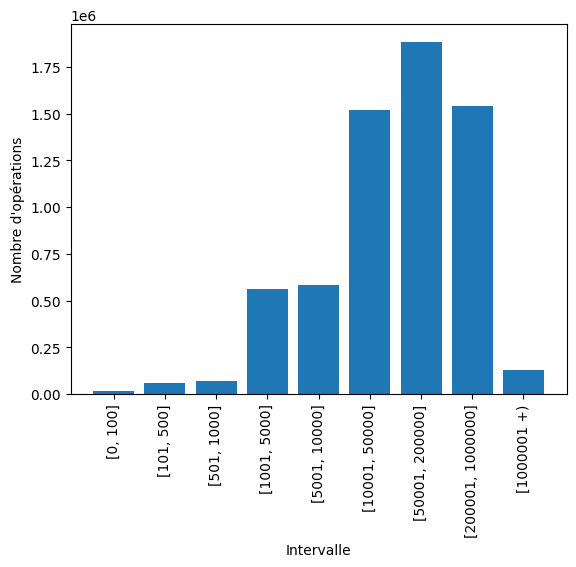

In [12]:
X = ['[0, 100]','[101, 500]','[501, 1000]','[1001, 5000]','[5001, 10000]','[10001, 50000]','[50001, 200000]','[200001, 1000000]','[1000001 +)']
Y = [amount.loc[i][0] for i in X]
plt.bar(X,Y)
plt.xlabel("Intervalle")
plt.xticks(rotation='vertical')
plt.ylabel("Nombre d'opérations")
plt.show()

La majorité des montants transférés sont compris entre [10.001, 1.000.000] u

In [13]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Seule 16 transactions sont suspectées d'êtres des fraudes

In [14]:
df['day'] = df.apply(calc_day, axis=1)

In [15]:
nb_transaction = df.groupby(['day']).agg({'step': ['count']})

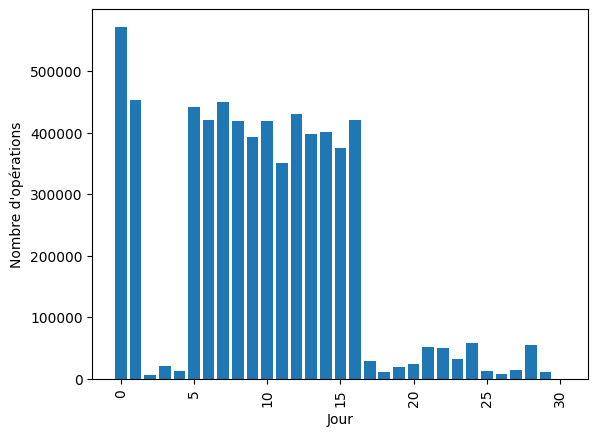

In [16]:
X = nb_transaction.index
Y = [nb_transaction.loc[i][0] for i in X]
plt.bar(X,Y)
plt.xlabel("Jour")
plt.xticks(rotation='vertical')
plt.ylabel("Nombre d'opérations")
plt.show()

On constate une hétérogénéité dans le nombre de transfers effectuée chaque jours

# Analyse des transactions étant des fraudes

In [17]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

8213 transaction sur 6354407 sont frauduleuses soit  0.129% des transactions

In [18]:
#Création du DF comprenant uniquement les transactions frauduleuses
df_fraud = df[df['isFraud'] == 1]

In [19]:
df_fraud["type"].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Seul les opérations de type 'CASH_OUT' et 'TRANSFER' aboutissent à des transactions fauduleuses

In [20]:
amount_fraud = df_fraud.groupby(['amount_range']).agg({'amount': ['count', 'min', 'max']})

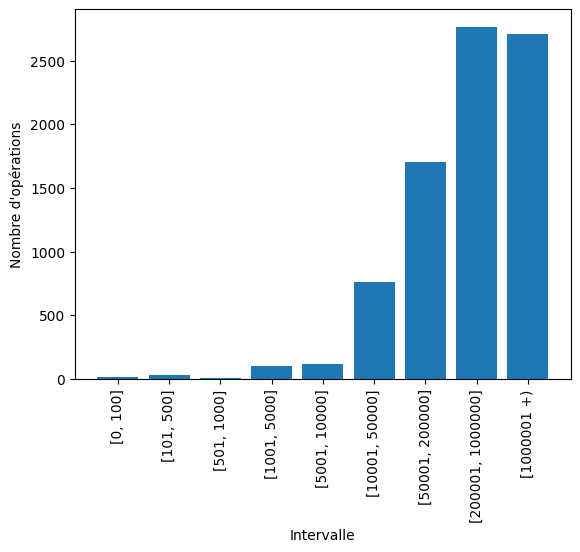

In [21]:
X = ['[0, 100]','[101, 500]','[501, 1000]','[1001, 5000]','[5001, 10000]','[10001, 50000]','[50001, 200000]','[200001, 1000000]','[1000001 +)']
Y = [amount_fraud.loc[i][0] for i in X]
plt.bar(X,Y)
plt.xlabel("Intervalle")
plt.xticks(rotation='vertical')
plt.ylabel("Nombre d'opérations")
plt.show()

On constate que la grande majorité des fraude ont lieu pour des montant supérieurs à 50 000 u

In [22]:
df_fraud['isFlaggedFraud'].value_counts()

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

Les 16 transactions portant l'indicateur 'isFlaggedFraud' s'avèrent bien être des transactions frauduleuses 

In [23]:
nb_transaction_fraud = df_fraud.groupby(['day']).agg({'step': ['count']})

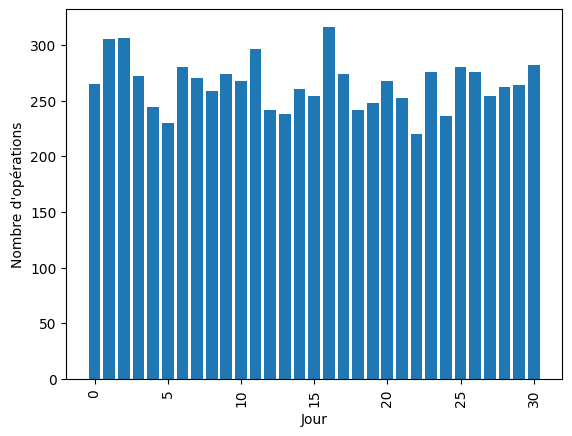

In [24]:
X = nb_transaction_fraud.index
Y = [nb_transaction_fraud.loc[i][0] for i in X]
plt.bar(X,Y)
plt.xlabel("Jour")
plt.xticks(rotation='vertical')
plt.ylabel("Nombre d'opérations")
plt.show()

Contrairement aux transferts dans leur généralité, le nombre de fraude par jour semble être assez constant

## Informations sur les comptes impliqués dans des transactions frauduleuses

In [25]:
df_M = df[df.nameDest.str.match('M')]
df_C = df[df.nameDest.str.match('C')]
print(f"Pourcentage de transactions fauduleuses lorsque que l'identifiants du compté destinataire commence par C : {df_C['isFraud'].value_counts()[1]/df_C.shape[0] *100:.2f}%")
print(f"Pourcentage de transactions fauduleuses lorsque que l'identifiants du compté destinataire commence par M (Marchand) : {(df_M['isFraud'].value_counts()[0]-df_M.shape[0])/df_M.shape[0] *100:.2f}%")

Pourcentage de transactions fauduleuses lorsque que l'identifiants du compté destinataire commence par C : 0.20%
Pourcentage de transactions fauduleuses lorsque que l'identifiants du compté destinataire commence par M (Marchand) : 0.00%


On constate que lorsqu'un compte Marchand est impliqué en tant que destinataire dans une transaction, celle ci ne peut pas être frauduleuse (Pour ce DataSet)

In [26]:
df_fraud['nD_count'] = df_fraud.groupby('nameDest')['nameDest'].transform('count')
df_fraud_twice = df_fraud[df_fraud['nD_count'] == 2]
print(f" {df_fraud_twice['nameDest'].nunique()} comptes destinataire sont impliqué à deux reprise dans des transactions frauduleuses")

 44 comptes destinataire sont impliqué à deux reprise dans des transactions frauduleuses


In [27]:
df_fraud['nO_count'] = df_fraud.groupby('nameOrig')['nameOrig'].transform('count')
df_frauded_twice = df_fraud[df_fraud['nO_count'] > 1]
df_frauded_twice.shape

(0, 15)

Aucun compte d'origine n'a été impliqué plus d'une fois dans une fraude